## CS 156 HW 4
### Ankush Hommerich-Dutt

1. **[d]**

The equation relating epsilon, delta, and $N$ is:

$$\epsilon = \sqrt{\frac{8}{N}\ln{\frac{4m_H(2N)}{\delta}}}$$

and if we plug in the 5 answer choices for $N$, given that $\epsilon = 0.05$ and $\delta = 0.05$ (because we want to have a $1-\delta=1-0.05=0.95$ percent confidence that our epsilon is at most 0.05):

$N = 400000: \epsilon = 0.0529$

$N = 420000: \epsilon = 0.0518$

$N = 440000: \epsilon = 0.0507$

$N = 460000: \epsilon = 0.0496$

$N = 480000: \epsilon = 0.0487$

and so we can see that $N = 460000$ gets us closest to the $\epsilon$ that we want of 0.05.

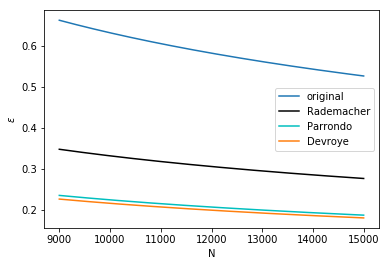

In [91]:
import random
import math
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

def func1(N):
    return np.sqrt((np.log(80) + 50*np.log(2*N)) * (8 / N))

def func2(N):
    return np.sqrt((np.log(2*N) + 50*np.log(N)) * (2 / N)) + np.sqrt(np.log(1 / 0.05) * (2 / N)) + (1 / N)

def func3(N):
    return (np.sqrt((N * (np.log(120) + 50*np.log(2*N))) + 1) / N) + (1 / N)

def func4(N):
    return (np.sqrt(((4*(2*N-4)) * (np.log(80) + 50*np.log(np.power(N, 2)))) + 16) + 4) / (4 * (N - 2))

t1 = np.arange(9000, 15000)
plt.plot(t1, func1(t1))
plt.plot(t1, func2(t1), 'k')
plt.plot(t1, func3(t1), 'c')
plt.plot(t1, func4(t1))
plt.xlabel('N')
plt.ylabel('$\epsilon$')
plt.legend(('original', 'Rademacher', 'Parrondo', 'Devroye'))
plt.show()

2. **[d]**

We can easily see that the Devroye bound is the lowest for large $N$ values such as $N=10000$. Note that I used Wolfram alpha to get an explicit form for the last two bounds.

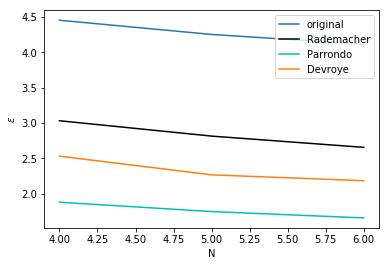

In [90]:
def func1(N):
    return np.sqrt((np.log(80) + np.log(np.power(2, 2*N))) * (8 / N))

def func2(N):
    return np.sqrt((np.log(2*N) + np.log(np.power(2, N))) * (2 / N)) + np.sqrt(np.log(1 / 0.05) * (2 / N)) + (1 / N)

def func3(N):
    return (np.sqrt((N * (np.log(120) + np.log(np.power(2, 2*N)))) + 1) / N) + (1 / N)

def func4(N):
    return (np.sqrt(((4*(2*N-4)) * (np.log(80) + np.log(np.power(2, np.power(N, 2))))) + 16) + 4) / (4 * (N - 2))

t1 = np.arange(4, 7)
plt.plot(t1, func1(t1))
plt.plot(t1, func2(t1), 'k')
plt.plot(t1, func3(t1), 'c')
plt.plot(t1, func4(t1))
plt.xlabel('N')
plt.ylabel('$\epsilon$')
plt.legend(('original', 'Rademacher', 'Parrondo', 'Devroye'))
plt.show()

3. **[c]**

We can easily see that the Parrondo and Van den Broek bound is the lowest for small $N$ values such as $N=5$. Note that I used Wolfram alpha to get an explicit form for the last two bounds. Also, I used $2^n$ for the growth function here since all of these $N$ values are less than the VC dimension.

In [92]:
class Point:
    def __init__(self, x, specs):
        if specs[0] == True and specs[1] == True and specs[2] == True:
            self.val = [1, np.power(x, 2), evaluate(x)]
        if specs[0] == True and specs[1] == True and specs[2] == False:
            self.val = [np.power(x, 2), evaluate(x)]
        if specs[0] == False and specs[1] == False and specs[2] == True:
            self.val = [1, evaluate(x)]
        if specs[0] == True and specs[1] == False and specs[2] == False:
            self.val = [x, evaluate(x)]
        if specs[0] == True and specs[1] == False and specs[2] == True:
            self.val = [1, x, evaluate(x)]    
        
def random_point(specs):
    return Point(random.uniform(-1,1), specs)

def evaluate(x):
    return math.sin(math.pi * x)

    
def gbar(n, specs):
    data = [random_point(specs) for x in range(n)]

    X = np.zeros((n, len(data[0].val) - 1))
    y = np.zeros((n, 1))
    for i in range(n):
        X[i,:] = data[i].val[:-1]
        y[i] = data[i].val[-1]   

    w = (LA.inv(X.T@X)@(X.T))@y  

    return w

def bias(g_avg, specs):
    
    g_avg_s = g_avg.shape
    g_avg.shape = (g_avg_s[0],)
    
    diffs = [0] * 100000
    for i in range(100000):
        a = random_point(specs)
        diff = math.pow(g_avg.dot(a.val[:-1]) - a.val[-1], 2)
        diffs[i] = diff
    biases = sum(diffs) / 100000
    
    return biases
    
def var_calc(g_avg, g, specs):    
    diffs = [0] * 1000
    
    g_avg_s = g_avg.shape
    g_avg.shape = (g_avg_s[0],)
    g_s = g.shape
    g.shape = (g_s[0],)
    
    for i in range(1000):
        a = random_point(specs)
        diff = math.pow(g_avg.dot(a.val[:-1]) - g.dot(a.val[:-1]), 2)
        diffs[i] = diff
    var = sum(diffs) / 1000
    return var
    
    
def main(specs):
    test = [gbar(2, specs) for i in range(100000)]
    g_avg = sum(test) / 100000
    biases = bias(g_avg, specs)
    test2 = [gbar(2, specs) for i in range(1000)]
    var = [0] * 1000
    for i in range(1000):
        var[i] = var_calc(g_avg, test[i], specs)
    variance = sum(var) / 1000
    if specs[3]:
        print("4. g_avg: ", g_avg[0], "x")
        print("5. bias: ", biases)
        print("6. variance: ", variance)
    print("E_out for hypothesis ", specs[4], 'is: ', biases + variance)
    
# 1st: a, 2nd: x^2, 3rd: b, 4th: print
main([False, False, True, False, 1])
main([True, False, False, True, 2])
main([True, False, True, False, 3])
main([True, True, False, False, 4])
main([True, True, True, False, 5])

E_out for hypothesis  1 is:  0.7523299941385717
4. g_avg:  1.428209923998659 x
5. bias:  0.2690392946329114
6. variance:  0.24170880078079449
E_out for hypothesis  2 is:  0.5107480954137058
E_out for hypothesis  3 is:  1.8542915027945401
E_out for hypothesis  4 is:  14.869794817629007
E_out for hypothesis  5 is:  336.6304731161627


4. **[e]**

1.25 as a is none of the answer choices, so e is the correct answer.

5. **[b]**

0.27 is closest to 0.3, so b is the correct answer.

6. **[a]**

0.24 is closest to 0.2, so a is the correct answer.

7. **[b]**

We can see that the second hypothesis $h(x) = ax$ gives us the smallest E_out, where E_out is bias + variance

8. **[b]**

Let us try and use different values for $q$ to see what the VC dimension is for them, and then we can maybe see a pattern and generalize:

$q = 2: m(2) = 2(2) - \binom{2}{2} = 3$ shattered last at $N=1$.

$q = 3: m(2) = 2(2) - \binom{2}{3} = 4, m(3) = 2(4) - \binom{3}{3} = 7$ shattered last at $N=2$.

$q = 4: m(2) = 2(2) - \binom{2}{4} = 4, m(3) = 2(4) - \binom{3}{4} = 8, m(4) = 2(8) - \binom{4}{4} = 15$ shattered last at $N=3$.

We can generalize and say that the general pattern for any $q$ is that the VC dimension (or the largest $N$ such that the growth function is still $2^N$) is $q-1$.

9. **[b]**

We know that the intersection of the $H_k$ sets could be an empty or singleton set, which is defined to have a VC dimension of 0, and so we know that is our lower bound. For the upper bound, we can see that choice A and C are too loose of an upper bound, since we know that the intersection of all of the sets has to be smaller in size than any of the single sets, and so we can only loose classification power from any of the original sets. Therefore, our new VC dimension will have to be less than or equal to the least powerful set in our original group, and therefore will be less than or equal to the least VC dimension of any of the $H_k$ sets. 

10. **[e]**

We know that when we union together the $H_k$ sets, we are not loosing any classification power, since now we simply have many more hypotheses than any of the original sets, which cannot hurt and can only help. Therefore, our lower bound is the max VC dimension of any of the original sets.

For the upper bound, it was unclear at first whether the answer choice was d or e. To get to the answer e, let us consider two singleton sets. Both of these sets have VC dimension of 0 (as defined for a singleton set), but if we union these two singleton sets into a set of two hypotheses, then it is possible that they can shatter 1 point (one hypothesis sends the point to +1 and the other hypothesis sends the point to -1). Therefore, the VC dimension of the union could be 1. This fits answer choice e, since answer choice d says the union of the two singleton sets has an upper bound of 0 on the VC dimension.
